### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

### Loading the Dataset

In [2]:
# load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Preprocessing

In [3]:
# converting the values between [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# convert MNIST images to RGB format (assuming white digit on black background)
x_train = np.stack([x_train, x_train, x_train], axis=-1)
x_test = np.stack([x_test, x_test, x_test], axis=-1)

# resize images to 100x100
x_train = tf.image.resize(x_train, [100, 100])
x_test = tf.image.resize(x_test, [100, 100])

### Data Representation

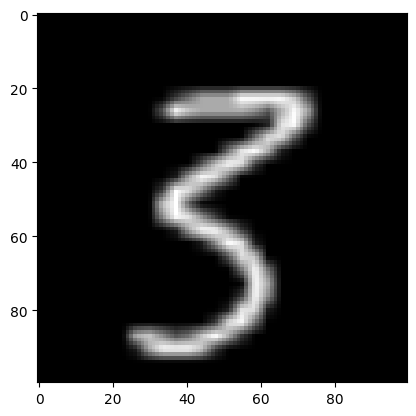

Label - 3


In [4]:
# plot the image
plt.imshow(x_train[540], cmap='gray')
plt.show()

print(f"Label - {y_train[540]}")

### Training

In [5]:
# create the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
 dense (Dense)               (None, 64)                4917312   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 4918858 (18.76 MB)
Trainable params: 4918858 (18.76 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [6]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


1875/1875 [==============================] - 105s 55ms/step - loss: 0.1796 - accuracy: 0.9471 - val_loss: 0.0801 - val_accuracy: 0.9746
Epoch 2/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0753 - val_accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0734 - val_accuracy: 0.9789
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0726 - val_accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.1068 - val_accuracy: 0.9758


### Testing

In [8]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_acc}')

313/313 [==============================] - 8s 25ms/step - loss: 0.1068 - accuracy: 0.9758
Test Accuracy: 0.9757999777793884
Test Loss: 0.9757999777793884


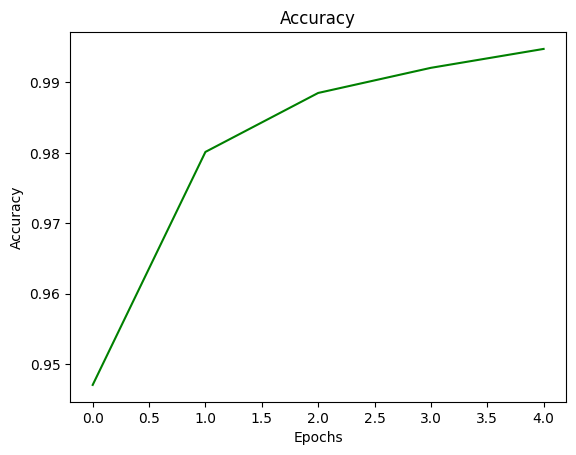

In [9]:
# plot the accuracy
plt.plot(history.history['accuracy'], color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

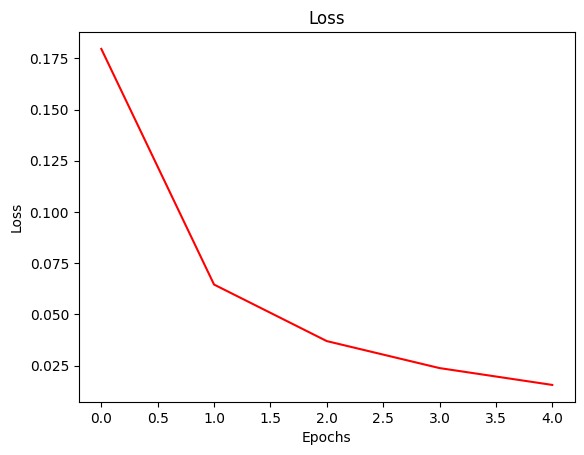

In [10]:
# plot the loss
plt.plot(history.history['loss'], color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

### Saving the Model

In [11]:
# save the model as .keras first
model.save('hdcs.keras')

In [12]:
# load the saved keras model
loaded_model = load_model('hdcs.keras')

# convert the loaded keras model to tensorflow lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# save the tensorflow lite model
with open('hdcs.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/pb/956wsyzs3y9128nmccpz4djc0000gn/T/tmpd7m1iwbv/assets


INFO:tensorflow:Assets written to: /var/folders/pb/956wsyzs3y9128nmccpz4djc0000gn/T/tmpd7m1iwbv/assets
2024-02-28 16:36:04.891146: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-28 16:36:04.891230: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 7, Total Ops 16, % non-converted = 43.75 %
 * 7 ARITH ops

- arith.constant:    7 occurrences  (f32: 6, i32: 1)



  (f32: 1)
  (f32: 2)
  (f32: 1)
  (f32: 1)
  (f32: 1)
